# 2nd workbook

In [120]:
import pandas as pd
import numpy as np
import os 
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from importlib import reload

In [3]:
import wrangle as wr
import summaries as su

In [4]:
df = wr.get_clean_data(start2018=True)

In [5]:
train, test = wr.split_data(df)

In [6]:
train

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,year,quarter,month_name,day_name,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,,
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,283.25,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,"4,532.00"
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,178.75,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,"2,860.00"
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,11.69,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,187.04
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,26.81,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,428.96
2018-01-02,San Benito Consolidated Independent School Dis...,K-12,San Benito,"Insight Public Sector, Inc.",Tempe,"78,586.00",1.00,63.36,191971,2018-02-03,2018-01-02,2018,1,January,Tuesday,1,1,1,2,63.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,Carrollton-Farmers Branch Independent School D...,K-12,Carrollton,Pivot Technology Services Corporation dba Comp...,Norcross,75011,8.00,404.29,199594,2022-02-02,2021-12-30,2021,4,December,Thursday,12,52,3,364,"3,234.32"
2021-12-30,City of Mercedes,Local Government,Mercedes,"Insight Public Sector, Inc.",Tempe,78570,3.00,165.00,22-67327,2022-07-31,2021-12-30,2021,4,December,Thursday,12,52,3,364,495.00
2021-12-30,City of Mercedes,Local Government,Mercedes,"Insight Public Sector, Inc.",Tempe,"78,570.00",4.00,165.00,22-67327,2022-04-30,2021-12-30,2021,4,December,Thursday,12,52,3,364,660.00


In [7]:
# take a look at value counts
columns = df.columns.to_list()
for i in columns:
    print(f'--------{i}-------')
    print(df[i].value_counts())
    print('___________________')
    

--------customer_name-------
Texas Health and Human Services Commission                      18725
Texas Department of Information Resources                       15096
Brownsville Independent School District                         11200
Harris County                                                    7602
The University of Texas Health Science Center at San Antonio     6160
                                                                ...  
Harris County Housing Authority                                     1
Whitharral Independent School District                              1
San Jacinto College District                                        1
Edgewood Independent School District Administration                 1
City of Odessa                                                      1
Name: customer_name, Length: 1116, dtype: int64
___________________
--------customer_type-------
K-12                86238
Local Government    81099
State Agency        50132
Higher Ed           43846


In [8]:
def create_customertype_subgroups(train):
    
    types = train[['purchase_amount','customer_type']]
    k_12= types[types["customer_type"]=='K-12']
    local_gov = types[types["customer_type"]=='Local Government']
    state_agency = types[types["customer_type"]=='State Agency']
    higher_ed = types[types["customer_type"]=='Higher Ed']
    other = types[types['customer_type']=='Other']
    
    return k_12, local_gov, state_agency, higher_ed, other

In [9]:
k_12, local_gov, state_agency, higher_ed, other = create_customertype_subgroups(train)

In [10]:
k_12

,purchase_amount,customer_type
order_date,,
2018-01-02,"4,532.00",K-12
2018-01-02,"2,860.00",K-12
2018-01-02,187.04,K-12
2018-01-02,428.96,K-12
2018-01-02,63.36,K-12
...,...,...
2021-12-29,"14,625.00",K-12
2021-12-29,"4,381.40",K-12
2021-12-29,"13,845.00",K-12


# Explore subgroups

In [311]:
df

,customer_name,customer_type,customer_city,reseller_name,reseller_city,customer_zip,order_quantity,unit_price,po_number,shipped_date,order_date_copy,year,quarter,month_name,day_name,month,week,day_of_week,day_of_year,purchase_amount
order_date,,,,,,,,,,,,,,,,,,,,
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,283.25,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,"4,532.00"
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,178.75,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,"2,860.00"
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,11.69,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,187.04
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,San Antonio,"78,370.00",16.00,26.81,173494,2018-01-11,2018-01-02,2018,1,January,Tuesday,1,1,1,2,428.96
2018-01-02,San Benito Consolidated Independent School Dis...,K-12,San Benito,"Insight Public Sector, Inc.",Tempe,"78,586.00",1.00,63.36,191971,2018-02-03,2018-01-02,2018,1,January,Tuesday,1,1,1,2,63.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,Harlingen Waterworks System,Local Government,HARLINGEN,"SHI Government Solutions, Inc.",Austin,78551,2.00,"1,234.62",232760,2022-11-29,2022-11-25,2022,4,November,Friday,11,47,4,329,"2,469.24"
2022-11-28,City of San Antonio,Local Government,San Antonio,Great South Texas Corporation dba Computer Sol...,San Antonio,78283,2.00,215.00,8000437865,2022-11-29,2022-11-28,2022,4,November,Monday,11,48,0,332,430.00
2022-11-28,City of Duncanville,Local Government,Duncanville,"SHI Government Solutions, Inc.",Austin,75116,6.00,87.63,20221128,2022-11-29,2022-11-28,2022,4,November,Monday,11,48,0,332,525.78


In [11]:
k_12.index

DatetimeIndex(['2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02',
               '2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02',
               '2018-01-02', '2018-01-02',
               ...
               '2021-12-22', '2021-12-28', '2021-12-28', '2021-12-28',
               '2021-12-28', '2021-12-29', '2021-12-29', '2021-12-29',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='order_date', length=81173, freq=None)

In [12]:
k_12.isnull().sum()

purchase_amount    0
customer_type      0
dtype: int64

In [13]:
k_12.isnull().sum()

purchase_amount    0
customer_type      0
dtype: int64

In [14]:
def get_timeseries_plus(df):
    print(pd.plotting.autocorrelation_plot(df.resample('W').mean()))
    print (df.groupby([df.index.year, df.index.month]).mean().unstack(0).plot())
    print(df.groupby([df.index.year, df.index.day]).mean().unstack(0).plot())
    y = df.resample('W').mean()

    result = sm.tsa.seasonal_decompose(y)
    print(result.plot())

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(792x288)


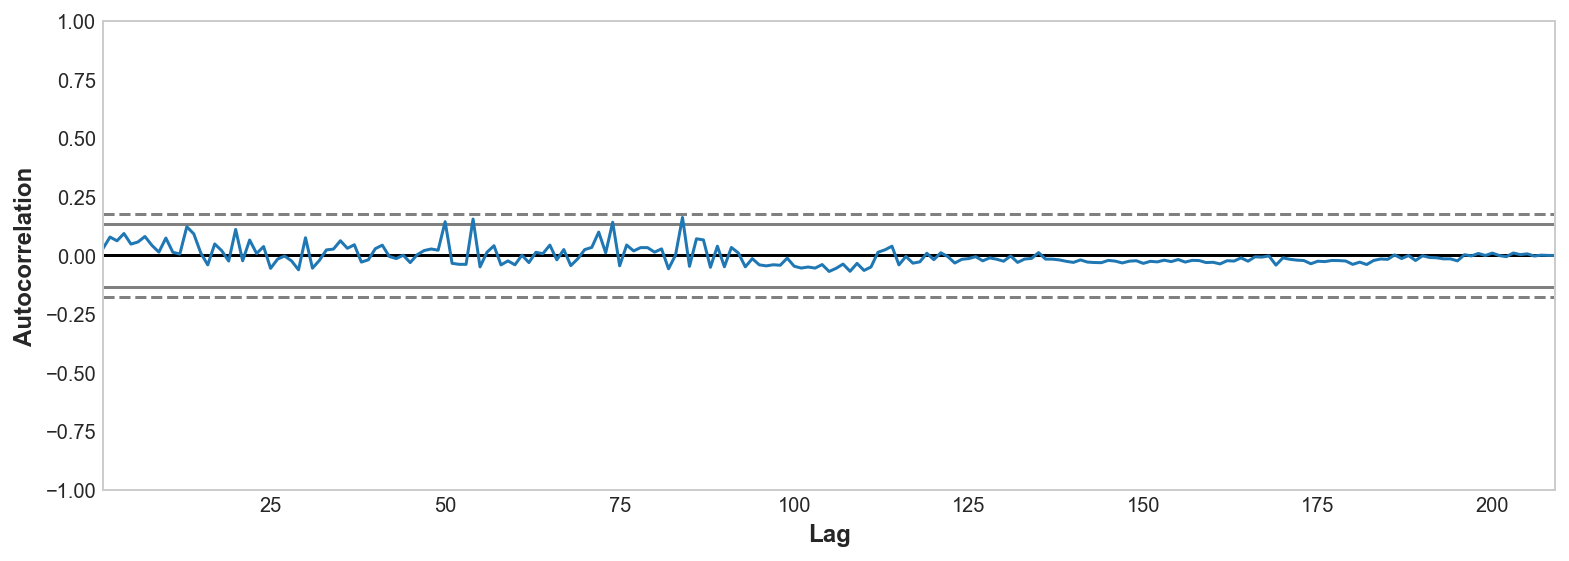

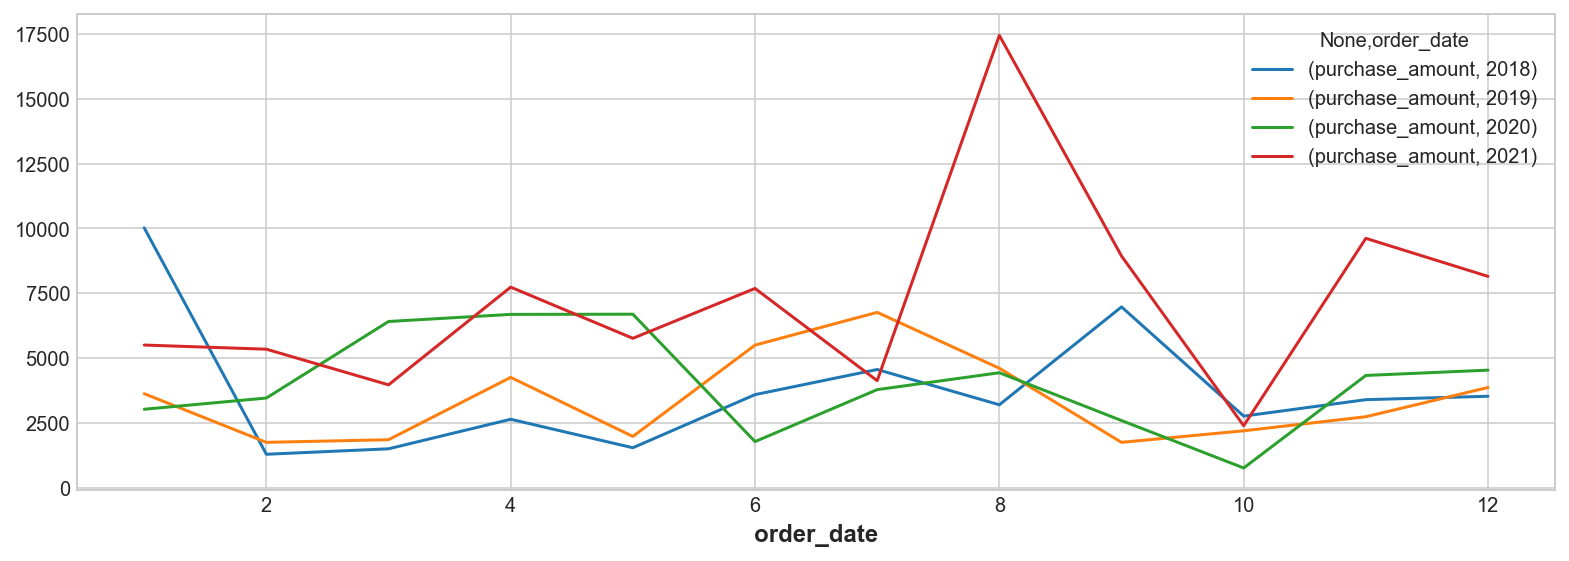

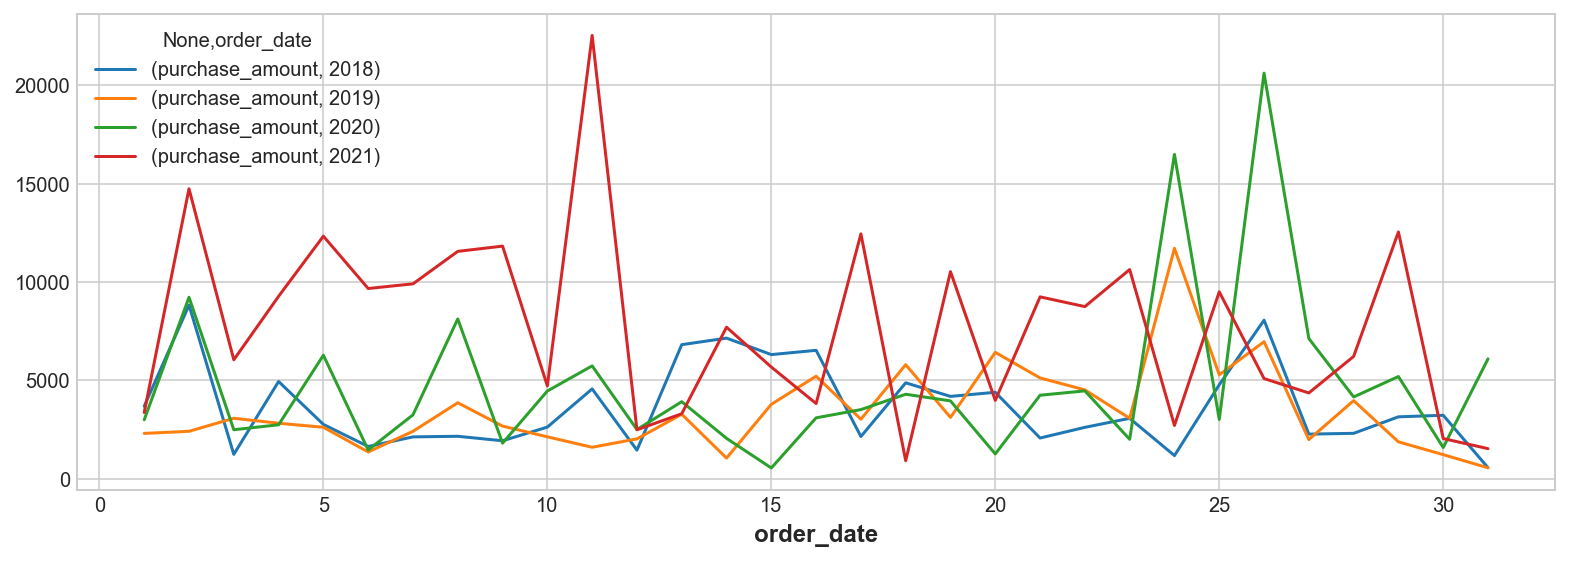

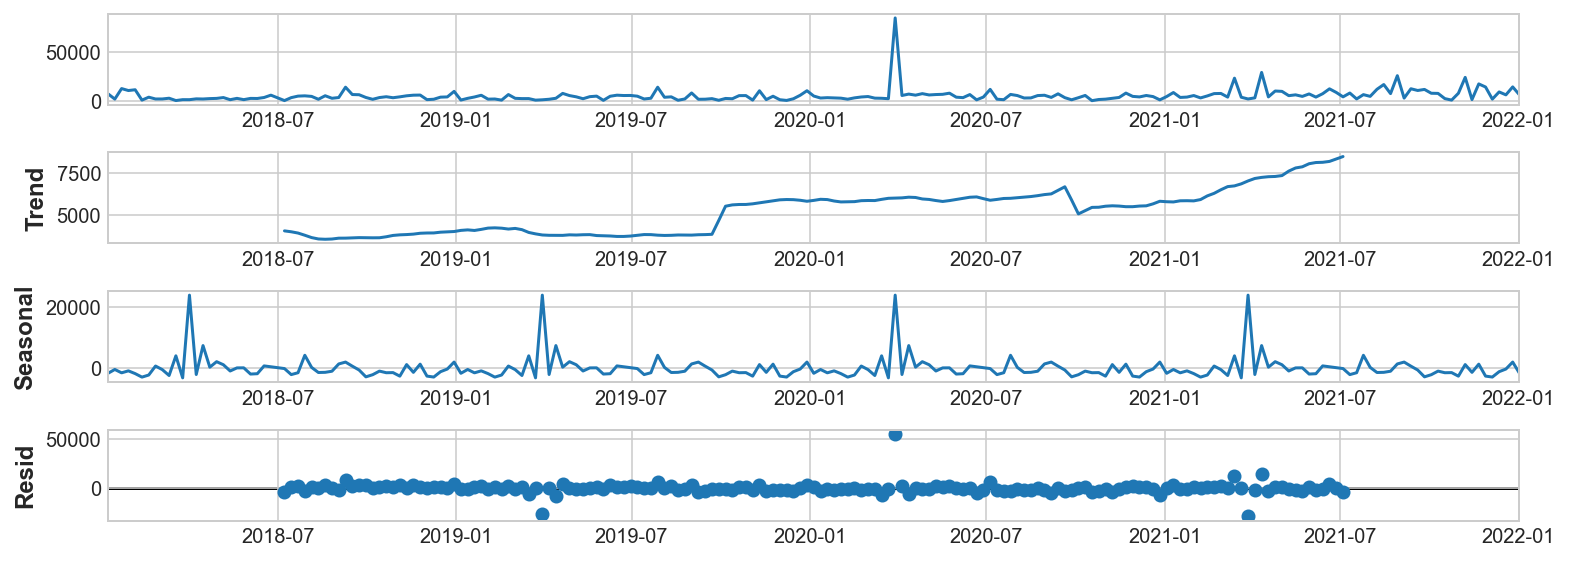

In [15]:
get_timeseries_plus(k_12)

In [16]:
su.get_customer_type_summary(train)

,total_purchase_amount,min_purchase_amount,max_purchase amount,average_purchase_amount,min_order_date,max_order_date,min_shipping_date,max_shipping_date
customer_type,,,,,,,,
Higher Ed,"200,305,221.56","-200,583.00","1,001,346.40","4,967.27",2018-01-02,2021-12-30,2018-01-05,2022-11-30
K-12,"298,079,471.56","-696,740.88","3,723,000.00","3,672.15",2018-01-02,2021-12-30,2018-01-02,2022-11-30
Local Government,"284,544,512.41","-468,750.00","2,028,000.00","3,937.73",2018-01-02,2021-12-31,2018-01-02,2022-11-30
Other,"1,918,628.88",-475.14,"101,420.58","3,579.53",2018-01-11,2021-12-22,2018-01-12,2022-02-28
State Agency,"171,212,339.55","-239,650.46","1,130,443.51","4,152.62",2018-01-05,2021-12-30,2018-01-11,2022-11-15


### time series at a glance

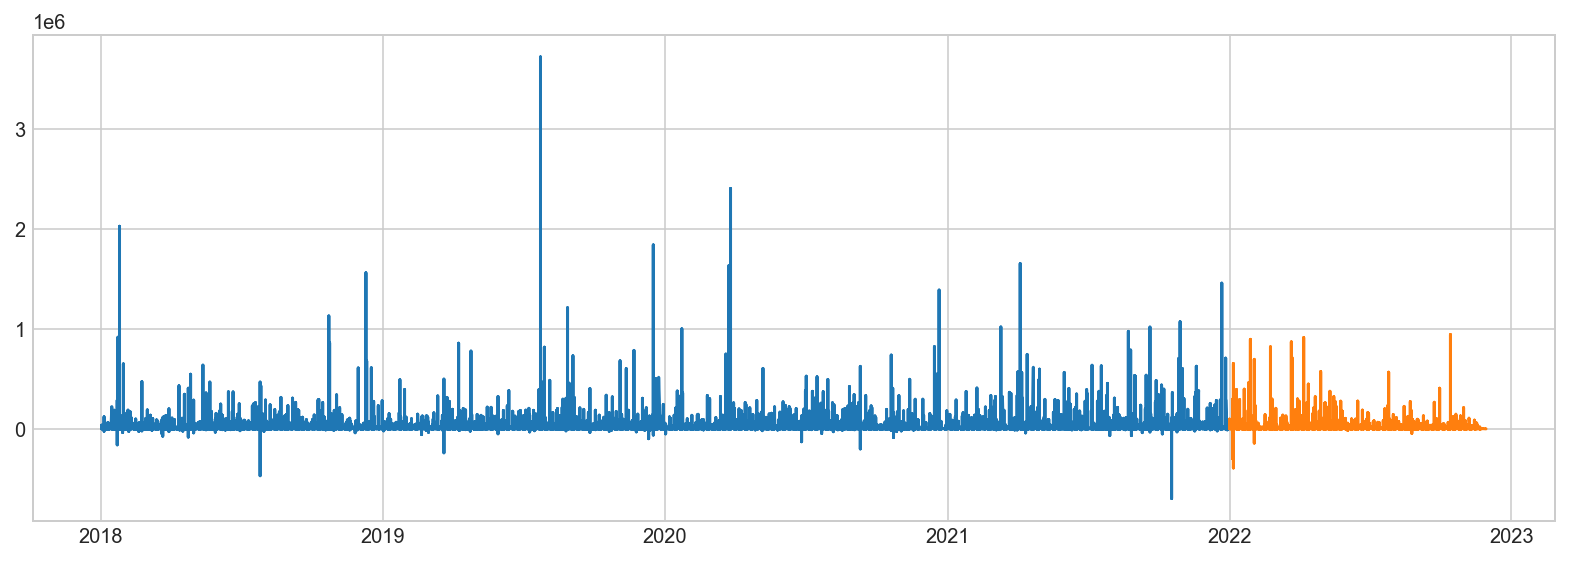

In [17]:
plt.plot(train.index, train.purchase_amount)
plt.plot(test.index, test.purchase_amount)

### distribution of variables

In [18]:
def distribution( df, var):
    ''' distribution takes in a dataframe and variable and returns a histoplot 
    that  display the distirbution of the variable'''
    # use histplot
    sns.histplot(df[var])
    #show plot
    plt.show();


In [19]:
 train.columns.to_list()

['customer_name',
 'customer_type',
 'customer_city',
 'reseller_name',
 'reseller_city',
 'customer_zip',
 'order_quantity',
 'unit_price',
 'po_number',
 'shipped_date',
 'order_date_copy',
 'year',
 'quarter',
 'month_name',
 'day_name',
 'month',
 'week',
 'day_of_week',
 'day_of_year',
 'purchase_amount']

# Average purchased sales/order quantity by month and sum by month

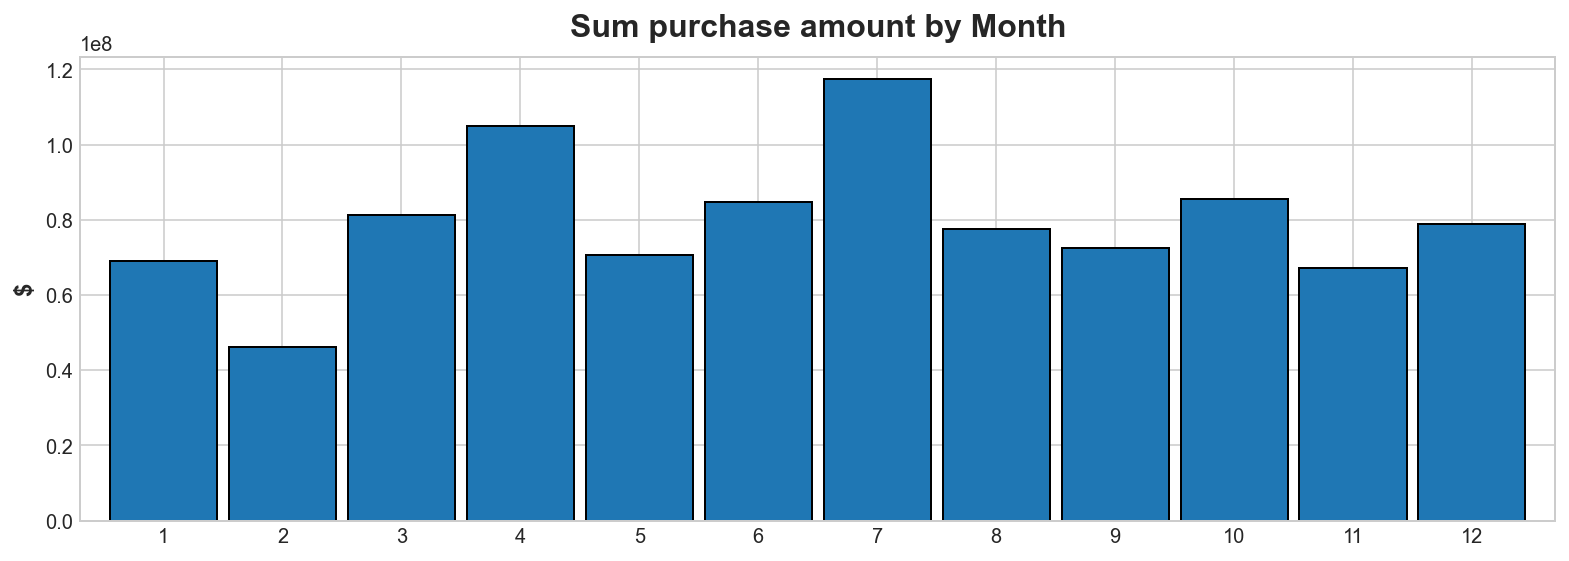

In [42]:
ax = train.groupby(train.month).purchase_amount.sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Sum purchase amount by Month', xlabel='', ylabel='$')
plt.show()

### for total sales the month of July seems to be the largest next largest is to April

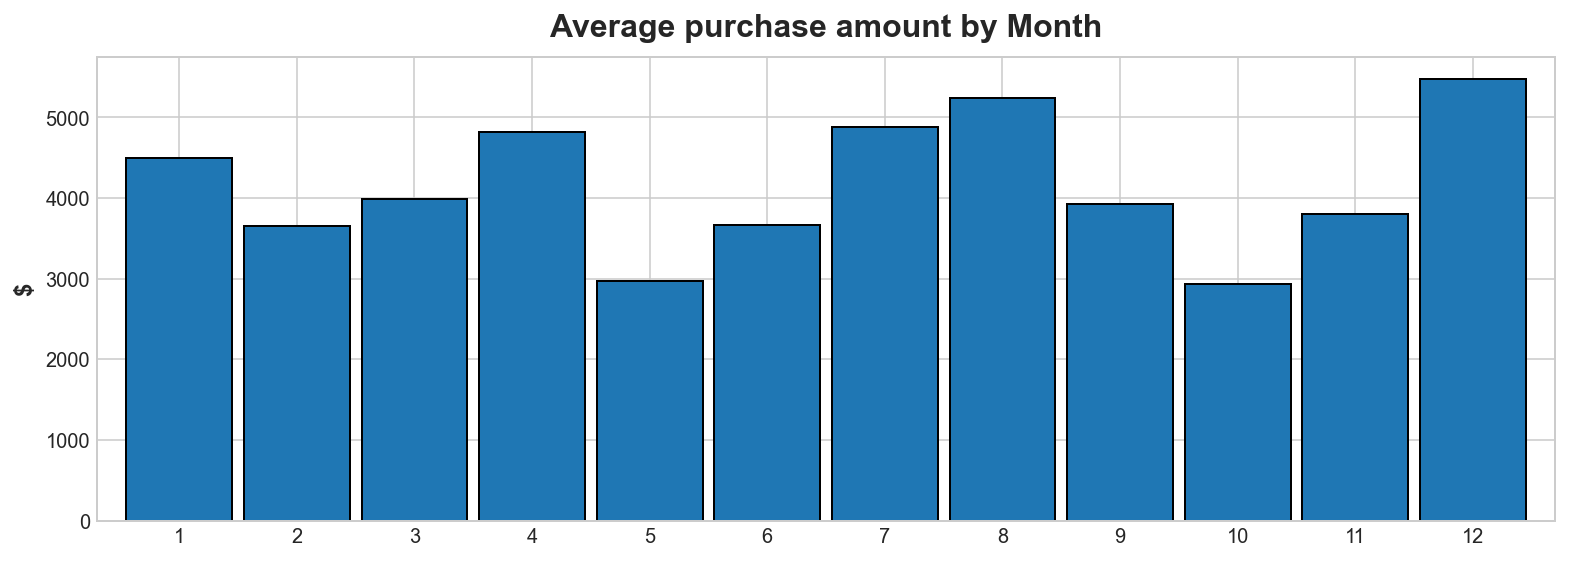

In [38]:
ax = train.groupby(train.month).purchase_amount.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average purchase amount by Month', xlabel='', ylabel='$')
plt.show()

### for average sales december seems to have the most

In [34]:
train[['purchase_amount','month']].groupby('month').describe()

purchase_amount                                                        \
                count     mean       std         min    25%    50%      75%   
month                                                                         
1           15,353.00 4,501.10 26,726.87 -159,904.75 114.00 464.10 2,180.37   
2           12,622.00 3,659.97 14,038.05  -56,708.45 127.50 462.50 2,297.34   
3           20,383.00 3,993.43 31,228.95 -239,650.46 140.01 693.00 1,759.50   
4           21,777.00 4,815.56 25,708.28  -81,758.97  57.00 415.02 2,198.63   
5           23,786.00 2,969.91 13,080.03  -49,500.00 160.20 424.80 1,448.73   
6           23,142.00 3,667.21 16,114.96 -128,760.00 160.09 594.09 1,429.42   
7           24,050.00 4,885.26 33,522.87 -468,750.00 160.20 442.24 1,982.68   
8           14,771.00 5,246.79 24,767.81  -66,871.00 124.10 684.00 2,867.41   
9           18,491.00 3,922.11 20,330.56 -200,583.00  15.41 239.98 1,489.65   
10          29,116.00 2,936.35 19,064.97 -696,740.88  27.75 325.00 1,032.17   
11          17,629.00 3,803.82 20,459.49  -38,841.19 160.20 554.45 1,590.60   
12          14,405.00 5,478.41 34,613.85  -98,143.46  82.66 646.00 3,396.00   

                    
               max  
month               
1     2,028,000.00  
2       472,950.00  
3     2,406,064.50  
4     1,654,773.44  
5       638,297.40  
6       565,171.52  
7     3,723,000.00  
8     1,212,924.79  
9     1,019,084.75  
10    1,130,443.51  
11      785,353.20  
12    1,841,400.00

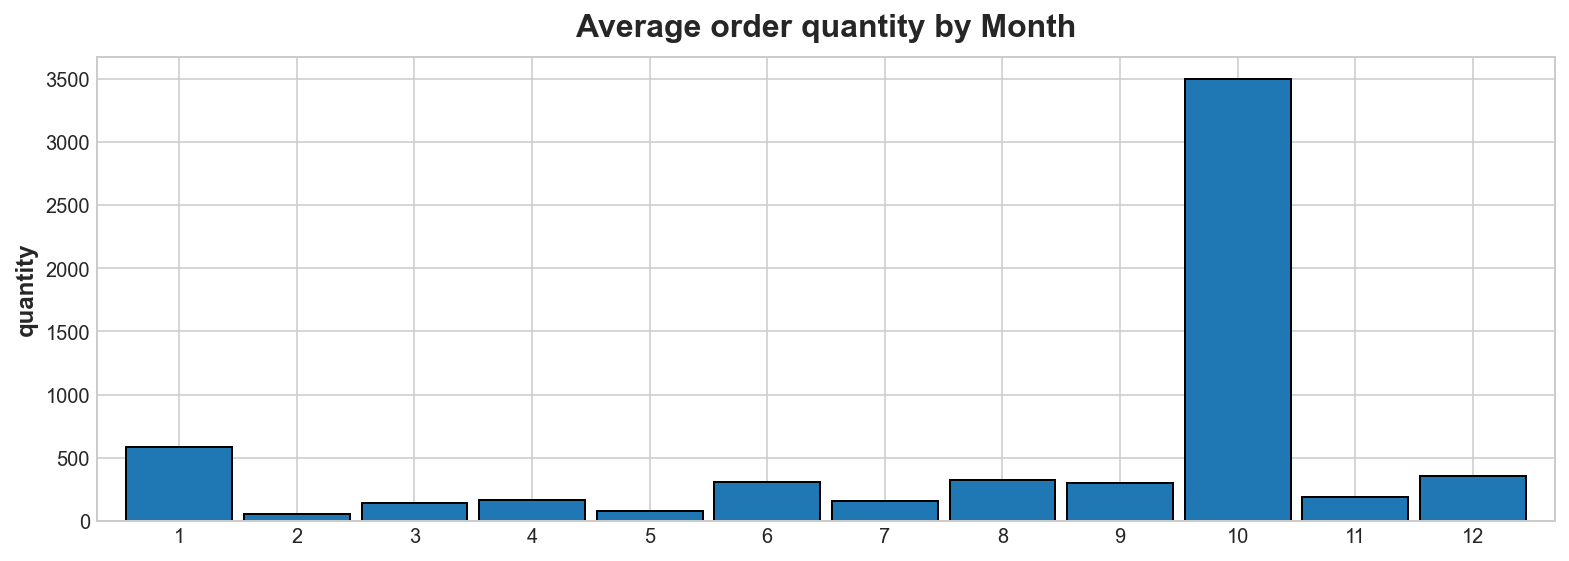

In [39]:
ax = train.groupby(train.month).order_quantity.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average order quantity by Month', xlabel='', ylabel='quantity')
plt.show()

### October has  a huge spike in order quantity

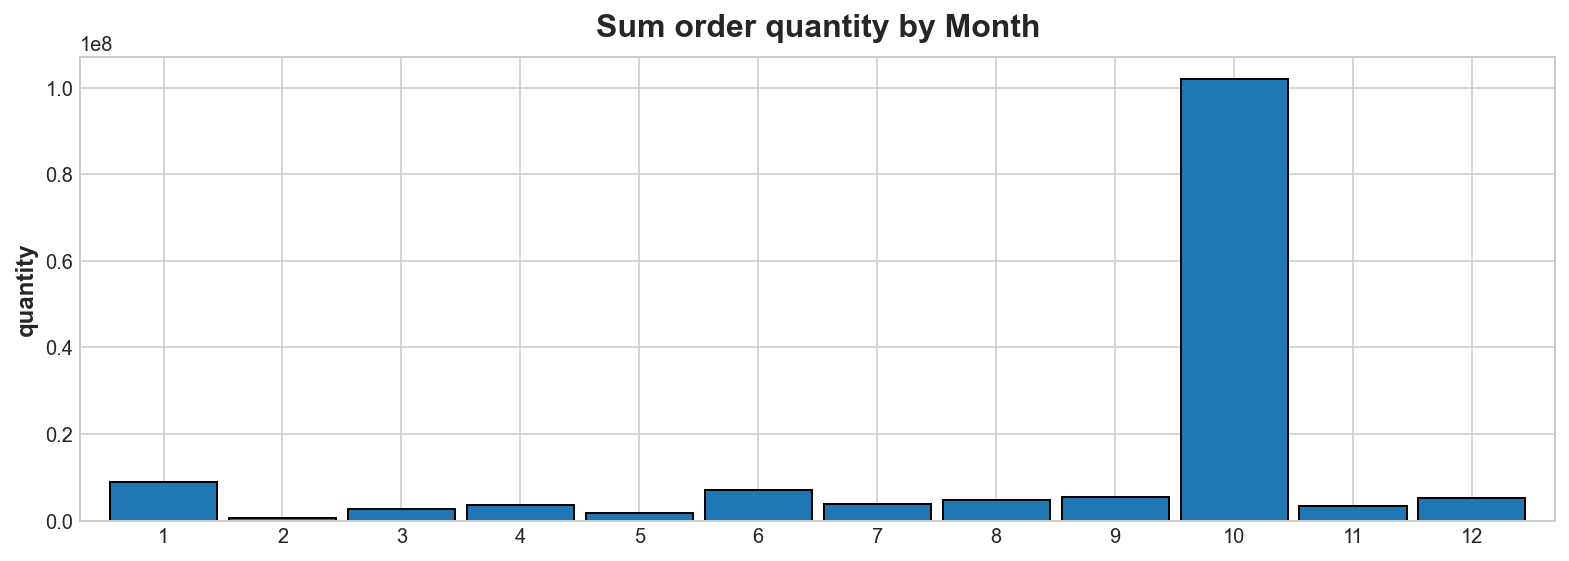

In [44]:
ax = train.groupby(train.month).order_quantity.sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Sum order quantity by Month', xlabel='', ylabel='quantity')
plt.show()

In [35]:
train[['order_quantity','month']].groupby('month').describe()

order_quantity                                                   \
               count     mean        std           min  25%  50%  75%   
month                                                                   
1          15,353.00   582.98  32,133.43       -864.35 1.00 1.00 3.00   
2          12,622.00    53.32   1,413.36    -59,619.00 1.00 1.00 3.00   
3          20,383.00   136.22   2,854.13       -185.00 1.00 1.00 3.00   
4          21,777.00   166.88   3,177.14    -30,490.00 1.00 1.84 3.00   
5          23,786.00    76.32   3,294.61     -3,500.00 1.00 1.00 2.00   
6          23,142.00   302.74  13,894.78    -34,800.00 1.00 1.00 2.00   
7          24,050.00   157.93  11,171.84   -799,867.61 1.00 1.00 3.00   
8          14,771.00   320.21   9,318.62     -5,825.00 1.00 1.00 4.00   
9          18,491.00   300.60  19,334.38 -1,273,855.94 0.34 1.00 2.00   
10         29,116.00 3,503.36 551,516.31    -99,999.00 1.00 1.00 2.00   
11         17,629.00   188.10   7,428.31    -46,796.61 1.00 1.00 2.00   
12         14,405.00   356.03   7,686.24     -1,365.30 1.00 1.00 4.00   

                     
                max  
month                
1      3,767,123.29  
2         77,760.00  
3        183,296.80  
4        180,000.00  
5        468,750.00  
6      1,216,118.75  
7        799,867.61  
8        711,350.00  
9      1,273,855.94  
10    94,093,187.00  
11       884,747.26  
12       390,000.00

<AxesSubplot:xlabel='month', ylabel='purchase_amount'>

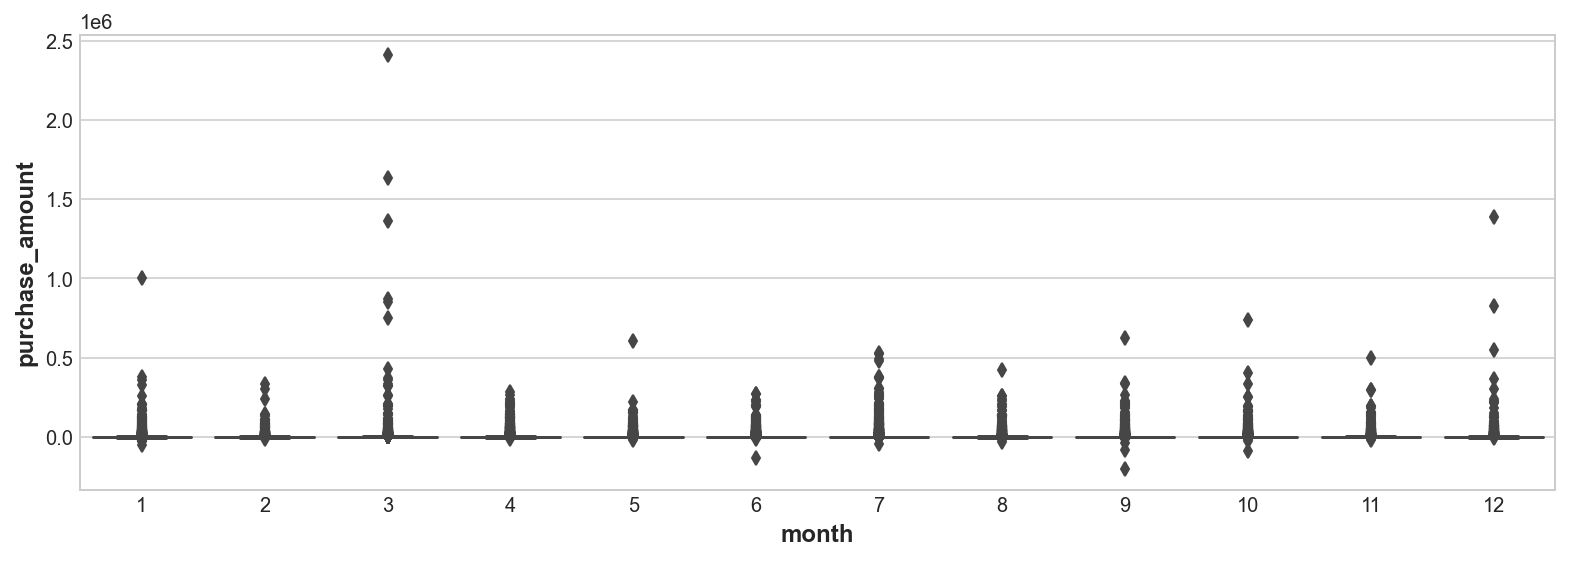

In [49]:
sns.boxplot(data = train['2020'], x = 'month', y = 'purchase_amount')

# Question look into 2017-07-24 the day with the largest sale

In [51]:
sdf = su.get_summary_df(train)

In [52]:
sdf

,customer_name,customer_type,customer_city,reseller_name,shipped_date,purchase_amount
order_date,,,,,,
2018-01-02,City of Austin,Local Government,Austin,"Netsync Network Solutions, Inc.",2018-02-14,252.00
2018-01-02,City of Euless,Local Government,Euless,CDW Government LLC,2018-01-02,"1,472.00"
2018-01-02,Conroe Independent School District,K-12,Conroe,CDW Government LLC,2018-01-02,"15,981.12"
2018-01-02,Galveston County,Local Government,Galveston,"Datavox, Inc",2018-01-31,"29,523.00"
2018-01-02,Odem-Edroy Independent School District,K-12,Odem,Great South Texas Corporation dba Computer Sol...,2018-01-11,"8,008.00"
...,...,...,...,...,...,...
2021-12-30,Teacher Retirement System of Texas,State Agency,Austin,"Presidio Networked Solutions Group, LLC",2022-04-12,"24,850.60"
2021-12-30,Texas Juvenile Justice Department,State Agency,Austin,"Presidio Networked Solutions Group, LLC",2022-01-25,"5,910.17"
2021-12-30,The University of Texas Health Science Center ...,Higher Ed,San Antonio,"Presidio Networked Solutions Group, LLC",2022-01-14,"2,022.99"


In [55]:
sdf.loc['2019-07-24'].purchase_amount.sum()

7034384.48

In [57]:
sdf.loc['2019-07-24'].groupby('customer_type').sum()

,purchase_amount
customer_type,
Higher Ed,"436,702.13"
K-12,"4,623,390.78"
Local Government,"78,695.20"
State Agency,"1,895,596.37"


### there was a large sale done my the k-12 group

In [99]:
k_12_max = train[(train.customer_type=='K-12')&(train.order_date_copy=='2019-07-24')]

In [104]:
k_12_max.groupby('customer_name').sum()

,order_quantity,unit_price,year,quarter,month,week,day_of_week,day_of_year,purchase_amount
customer_name,,,,,,,,,
Allen Independent School District,3.00,"4,852.42",6057,9,21,90,6,615,"4,852.42"
Brownsville Independent School District,12.00,"1,737.34",12114,18,42,180,12,1230,"1,866.72"
Decatur Independent School District,1.00,10.58,2019,3,7,30,2,205,10.58
Edgewood Independent School District,7.75,390.00,4038,6,14,60,4,410,"1,511.25"
Fort Bend Independent School District,"482,299.54","388,513.08",240261,357,833,3570,238,24395,"4,126,677.13"
Luling Independent School District,126.00,67.50,2019,3,7,30,2,205,"8,505.00"
Magnolia Independent School District,1.00,192.00,2019,3,7,30,2,205,192.00
Matagorda Independent School District,4.00,"1,051.92",6057,9,21,90,6,615,"1,171.32"
Northside Independent School District,"5,605.00",469.63,6057,9,21,90,6,615,"453,266.41"


# Question: look into the day with the largest order date...right before pandemic

In [68]:
sdf2 = su.get_summary_df(train)

In [70]:
sdf2.loc['2020-01-02']

,customer_name,customer_type,customer_city,reseller_name,shipped_date,purchase_amount
order_date,,,,,,
2020-01-02,Bastrop County,Local Government,Bastrop,"SHI Government Solutions, Inc.",2020-01-03,211.00
2020-01-02,City of Baytown,Local Government,Baytown,"Presidio Networked Solutions Group, LLC",2020-01-07,"2,602.14"
2020-01-02,City of Frisco,Local Government,Frisco,"Netsync Network Solutions, Inc.",2020-01-11,"11,607.48"
2020-01-02,City of Houston,Local Government,Houston,"Netsync Network Solutions, Inc.",2020-01-11,"42,767.50"
2020-01-02,City of Lewisville,Local Government,Lewisville,"Presidio Networked Solutions Group, LLC",2020-01-03,507.38
2020-01-02,City of Round Rock,Local Government,Round Rock,"Presidio Networked Solutions Group, LLC",2020-01-06,32.59
2020-01-02,City of Wichita Falls,Local Government,Wichita Falls,CDW Government LLC,2020-01-14,"5,690.00"
2020-01-02,City of Wichita Falls,Local Government,Wichita Falls,CDW Government LLC,2020-01-17,"1,898.96"
2020-01-02,Cy-Fair Volunteer Fire Department,Local Government,Houston,CDW Government LLC,2020-02-27,"235,966.25"


In [71]:
def get_summary_orders_df(df):
    '''
    Groups by order date, customer name, customer type, customer city and reseller name.
    Calculates the purchase amount by the end. of the day
    
    Parameters:
        df: pandas data frame with the data pulled from DIR site
    Returns:
        pd.DataFrame with the sum of the purchase amount by the end of the day for every company
    '''
    summary_df = pd.DataFrame()
    if 'order_date_copy' in df.columns:
        summary_df = df.groupby(by=\
                        ['order_date_copy', 'customer_name', 'customer_type', 'customer_city', 'reseller_name', 'shipped_date'])\
                        .order_quantity.sum().to_frame().reset_index()
        summary_df.rename(columns={'order_date_copy':'order_date'}, inplace=True)
        summary_df = summary_df.set_index('order_date').sort_index()
    elif 'order_date' in df.columns:
        summary_df = df.groupby(by=\
                        ['order_date', 'customer_name', 'customer_type', 'customer_city', 'reseller_name', 'shipped_date'])\
                        .purchase_amount.sum().to_frame().reset_index()
        summary_df = summary_df.set_index('order_date').sort_index()  
    return summary_df

In [73]:
orders = get_summary_orders_df(train)

In [74]:
orders.loc['2020-01-02']

,customer_name,customer_type,customer_city,reseller_name,shipped_date,order_quantity
order_date,,,,,,
2020-01-02,Bastrop County,Local Government,Bastrop,"SHI Government Solutions, Inc.",2020-01-03,1.00
2020-01-02,City of Baytown,Local Government,Baytown,"Presidio Networked Solutions Group, LLC",2020-01-07,6.00
2020-01-02,City of Frisco,Local Government,Frisco,"Netsync Network Solutions, Inc.",2020-01-11,5.00
2020-01-02,City of Houston,Local Government,Houston,"Netsync Network Solutions, Inc.",2020-01-11,2.00
2020-01-02,City of Lewisville,Local Government,Lewisville,"Presidio Networked Solutions Group, LLC",2020-01-03,3.00
2020-01-02,City of Round Rock,Local Government,Round Rock,"Presidio Networked Solutions Group, LLC",2020-01-06,1.00
2020-01-02,City of Wichita Falls,Local Government,Wichita Falls,CDW Government LLC,2020-01-14,4.00
2020-01-02,City of Wichita Falls,Local Government,Wichita Falls,CDW Government LLC,2020-01-17,4.00
2020-01-02,Cy-Fair Volunteer Fire Department,Local Government,Houston,CDW Government LLC,2020-02-27,117.00


# modeling prep

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = wr.split_data(df, explore=False)

In [129]:
train_series = train['purchase_amount']

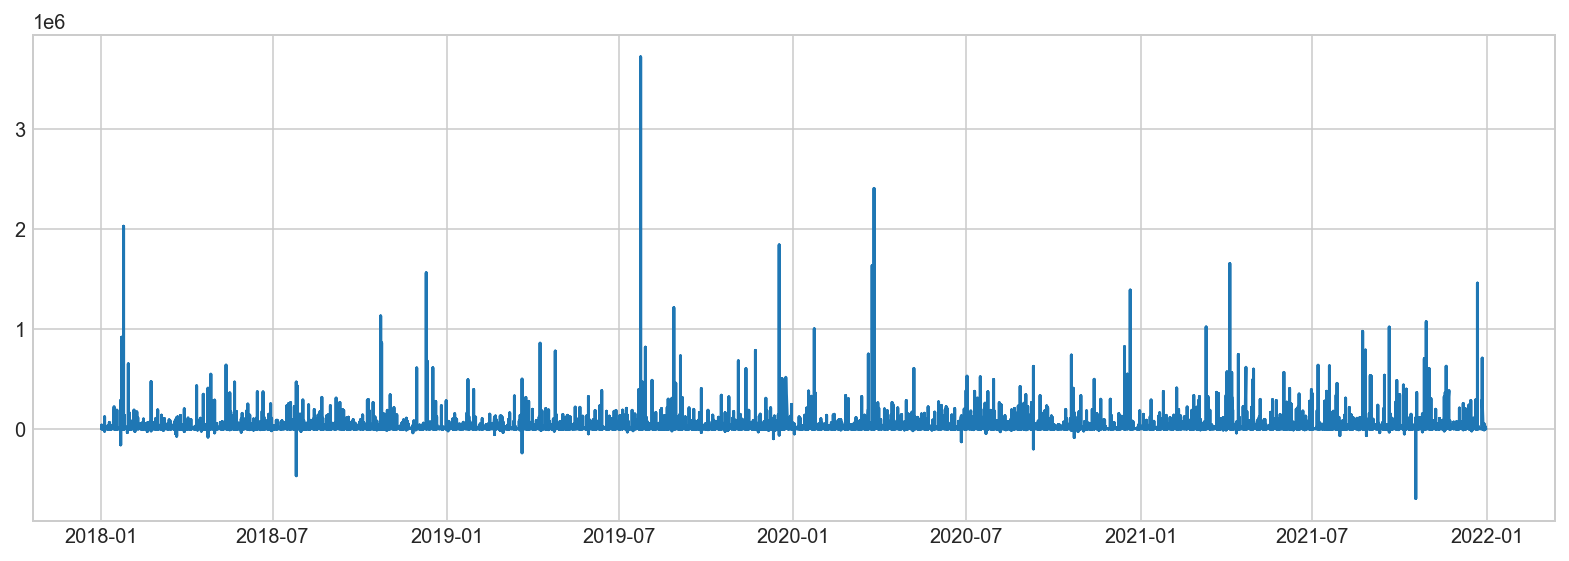

In [130]:
plt.plot(train['purchase_amount'])

<AxesSubplot:xlabel='order_date'>

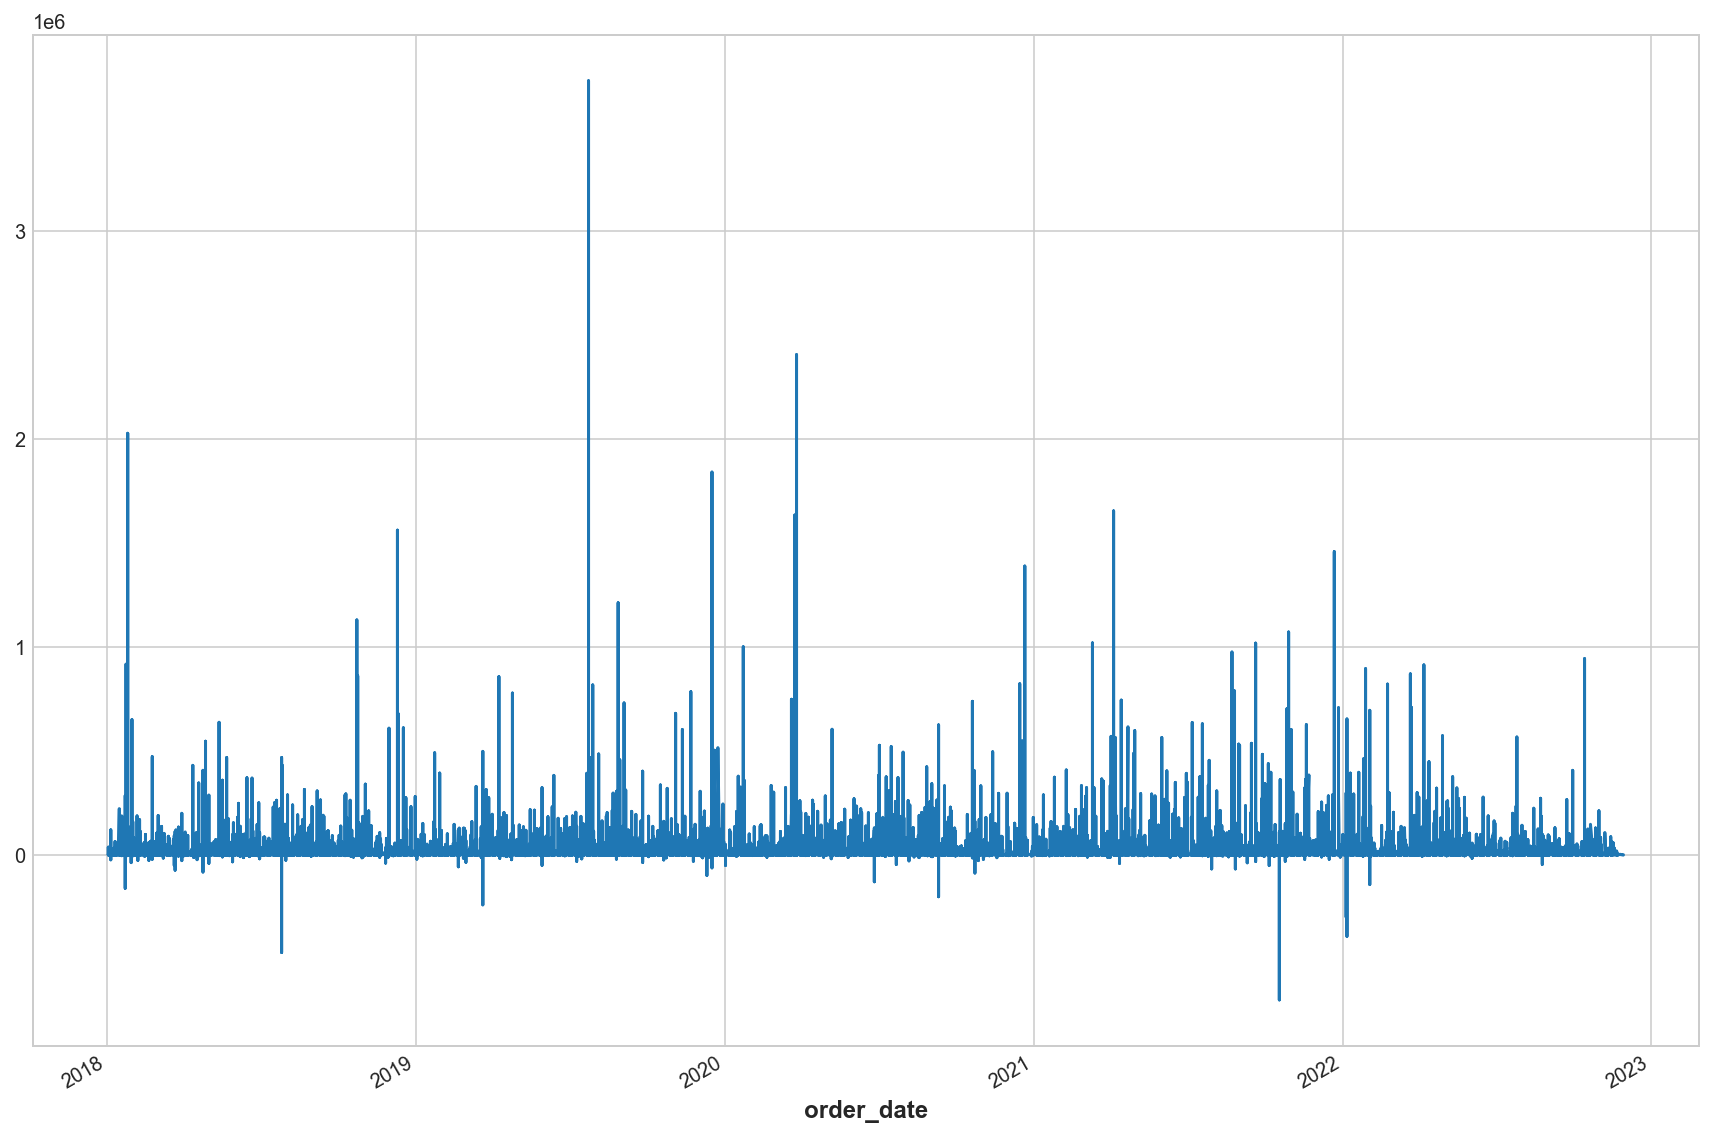

In [140]:
df.purchase_amount.plot(figsize=(12,8))

### create model dataframe

In [141]:
model_df = df[['purchase_amount']]

In [169]:
model_df_weekly= model_df.resample("W").mean()

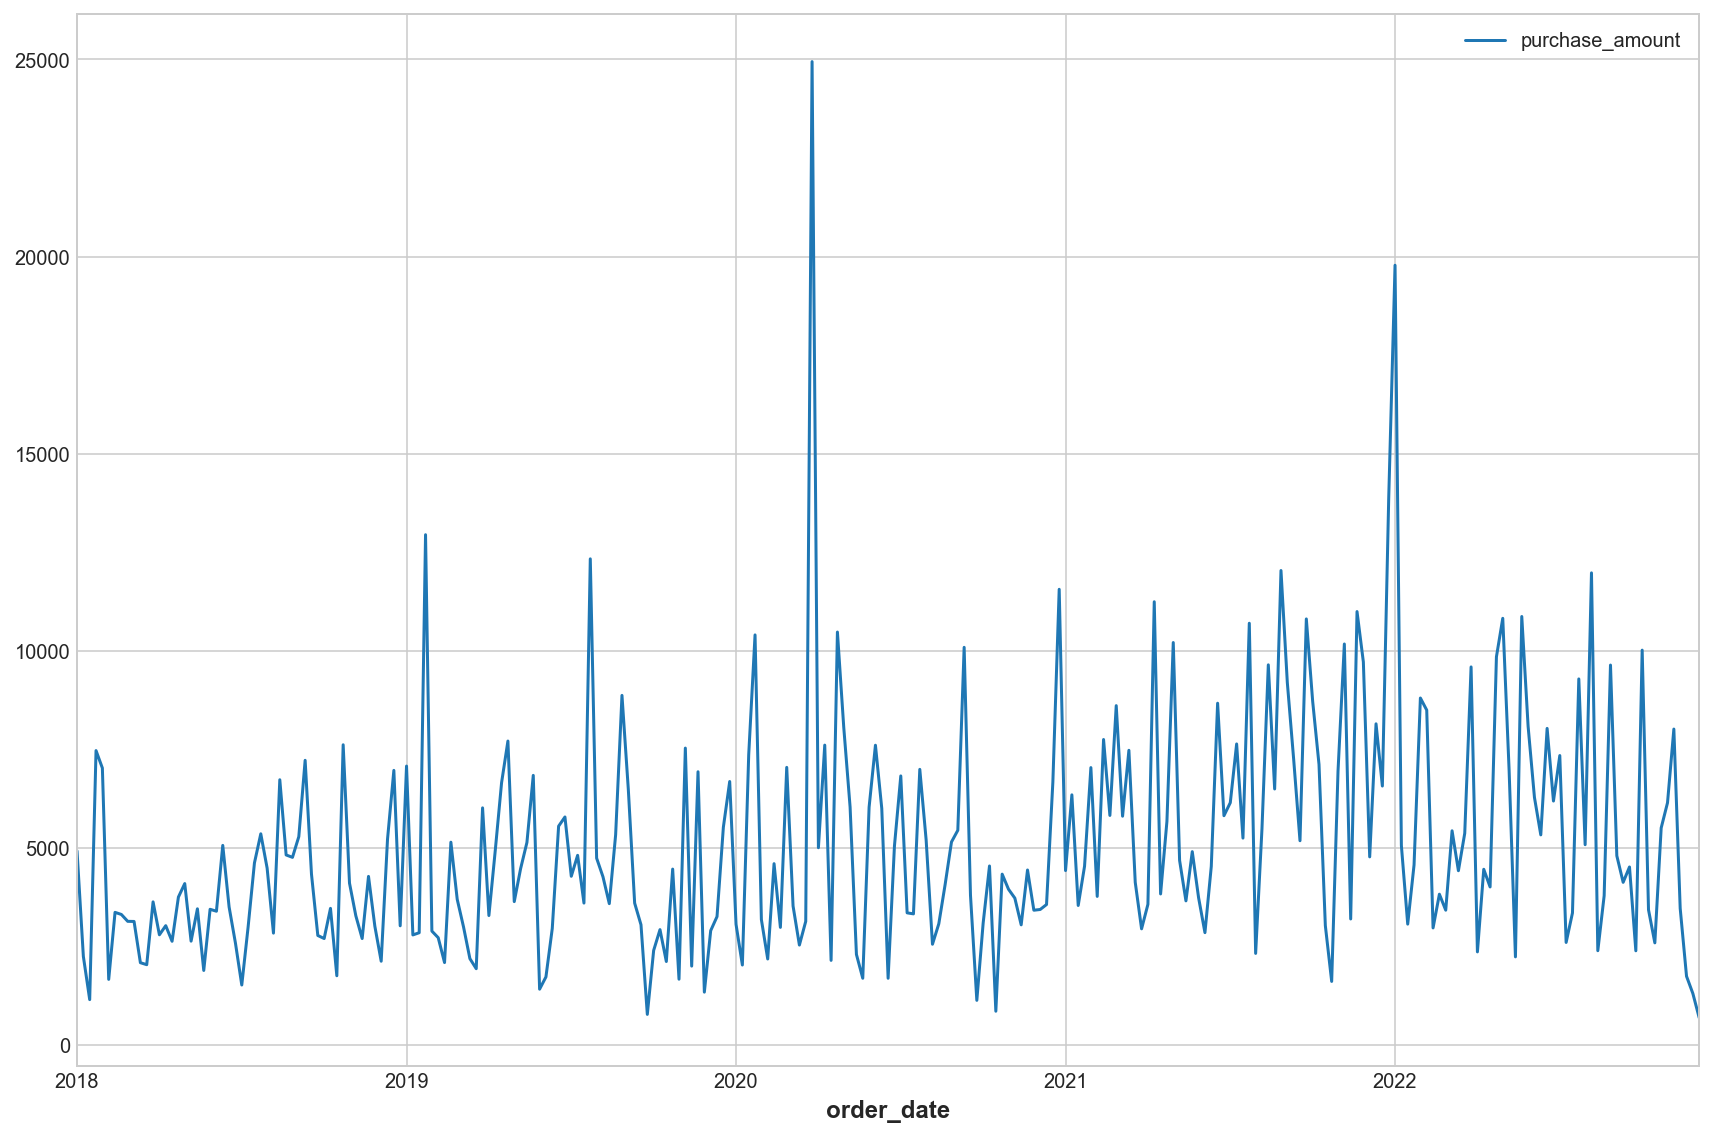

In [170]:
model_df_weekly.plot(figsize=(12,8));

In [171]:
model_df_weekly

,purchase_amount
order_date,
2018-01-07,"4,922.80"
2018-01-14,"2,244.77"
2018-01-21,"1,148.53"
2018-01-28,"7,466.56"
2018-02-04,"7,023.71"
...,...
2022-11-06,"8,012.67"
2022-11-13,"3,464.80"
2022-11-20,"1,741.60"


In [172]:
model_df_weekly['sale_last_week'] = model_df_weekly['purchase_amount'].shift(1)
model_df_weekly['sale_2weeks_back'] = model_df_weekly.purchase_amount.shift(2)
model_df_weekly['sale_3weeks_back'] = model_df_weekly.purchase_amount.shift(3)

In [317]:
# train
#model_df_weekly[3:-101]
# validate
#model_df_weekly["2021"]
# test
#model_df_weekly[-49:]

,purchase_amount,sale_last_week,sale_2weeks_back,sale_3weeks_back
order_date,,,,
2021-01-03,"4,422.26","11,558.08","6,669.91","3,561.20"
2021-01-10,"6,344.09","4,422.26","11,558.08","6,669.91"
2021-01-17,"3,536.94","6,344.09","4,422.26","11,558.08"
2021-01-24,"4,532.65","3,536.94","6,344.09","4,422.26"
2021-01-31,"7,035.12","4,532.65","3,536.94","6,344.09"
2021-02-07,"3,767.30","7,035.12","4,532.65","3,536.94"
2021-02-14,"7,748.05","3,767.30","7,035.12","4,532.65"
2021-02-21,"5,821.01","7,748.05","3,767.30","7,035.12"
2021-02-28,"8,606.74","5,821.01","7,748.05","3,767.30"


In [309]:
model_df_weekly

,purchase_amount,sale_last_week,sale_2weeks_back,sale_3weeks_back
order_date,,,,
2018-01-07,"4,922.80",NaN,NaN,NaN
2018-01-14,"2,244.77","4,922.80",NaN,NaN
2018-01-21,"1,148.53","2,244.77","4,922.80",NaN
2018-01-28,"7,466.56","1,148.53","2,244.77","4,922.80"
2018-02-04,"7,023.71","7,466.56","1,148.53","2,244.77"
...,...,...,...,...
2022-11-06,"8,012.67","6,143.50","5,504.14","2,588.53"
2022-11-13,"3,464.80","8,012.67","6,143.50","5,504.14"
2022-11-20,"1,741.60","3,464.80","8,012.67","6,143.50"


In [290]:
lin_model = LinearRegression()
model = RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=400, random_state=123)

In [291]:
best_random

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)

In [292]:
y=np.array(model_df_weekly.purchase_amount)
x1,x2,x3 = np.array(model_df_weekly.sale_last_week), np.array(model_df_weekly.sale_2weeks_back), np.array(model_df_weekly.sale_3weeks_back)

In [293]:
x1,x2,x3,y = x1.reshape(-1, 1),  x2.reshape(-1, 1), x3.reshape(-1, 1),y.reshape(-1, 1)

In [294]:
final_x = np.concatenate((x1,x2,x3), axis = 1)


### split for train test

In [295]:
# cut off all null values start train at index 3
X_train, X_val, X_test, y_train,y_val, y_test = final_x[3:-101],final_x[-101:-49],final_x[-49:], y[3:-101],y[-101:-49],y[-49:]

In [296]:
# random Forest
model.fit(X_train, y_train)
# linear regression
lin_model.fit(X_train,y_train)

LinearRegression()

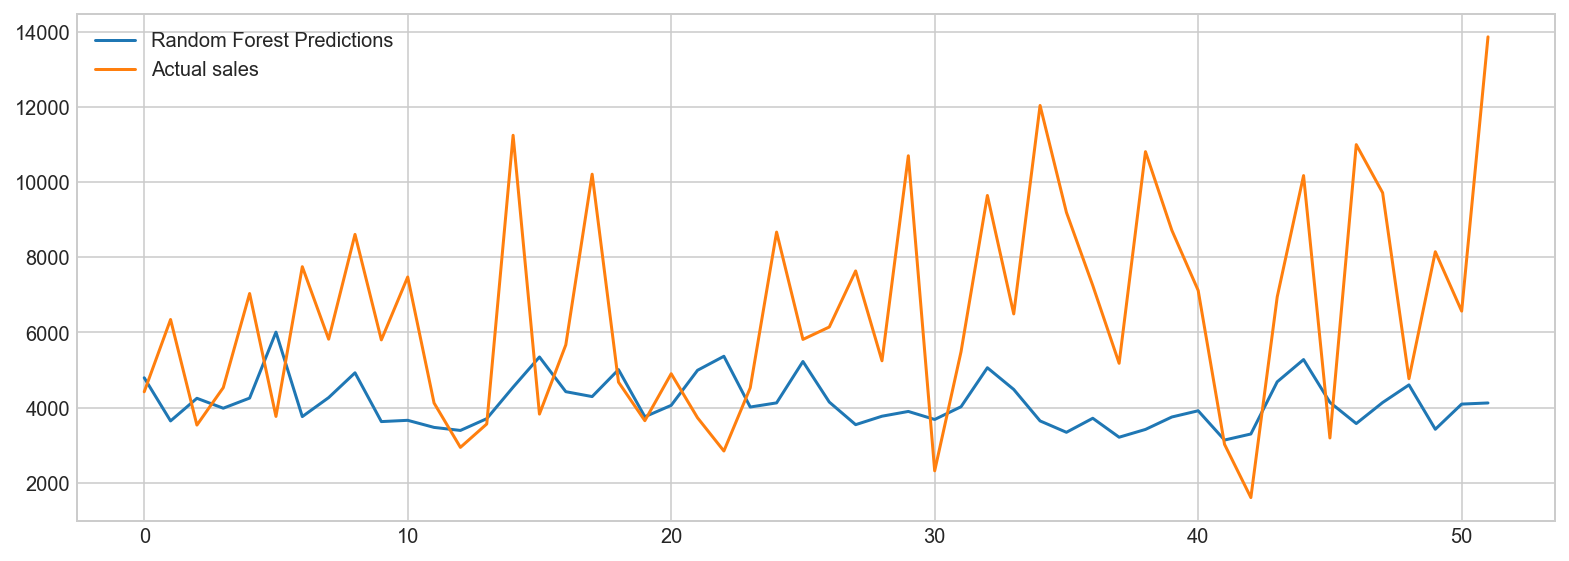

In [297]:
pred=model.predict(X_val)
plt.plot(pred, label = 'Random Forest Predictions')
plt.plot(y_val, label='Actual sales')
plt.legend(loc = 'upper left')
plt.show()

In [298]:
# RMSE
rmse_randomforest= sqrt(mean_squared_error(pred, y_val))
rmse_randomforest

3764.032877750819

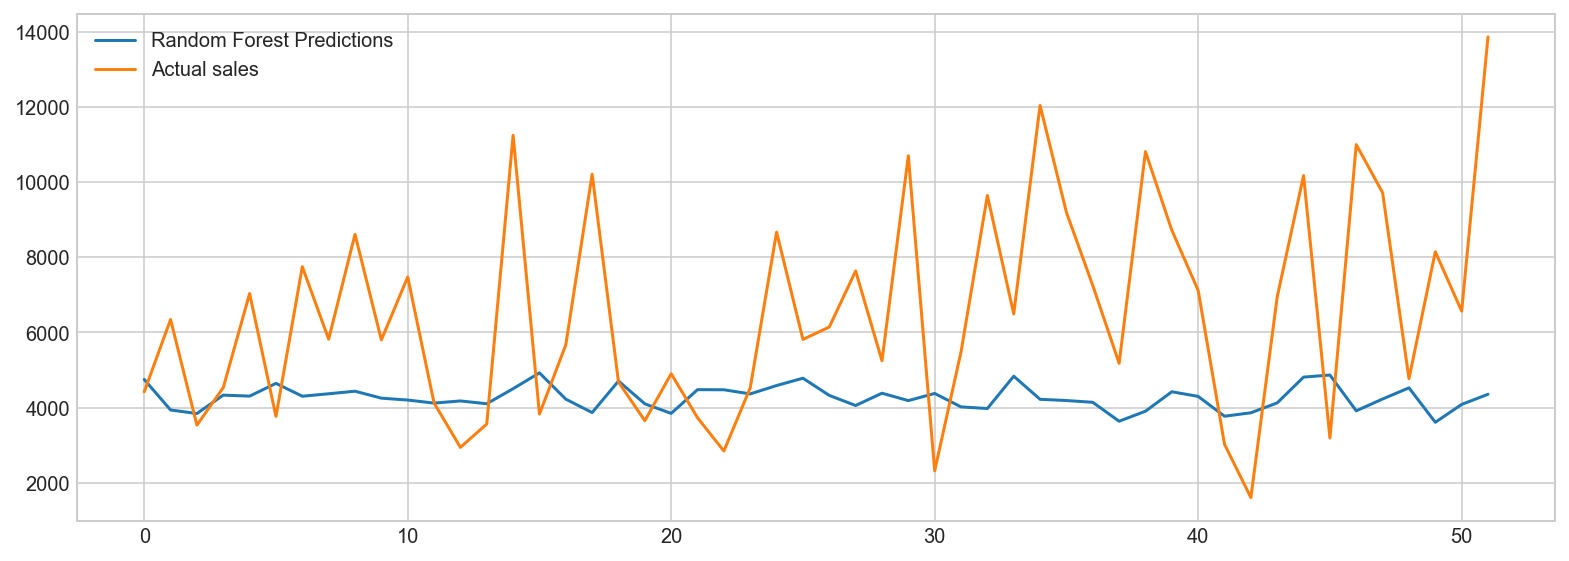

In [283]:
lin_pred=lin_model.predict(X_val)
plt.plot(lin_pred, label = 'Random Forest Predictions')
plt.plot(y_val, label='Actual sales')
plt.legend(loc = 'upper left')
plt.show()

In [285]:
# RMSE
rmse_linear= sqrt(mean_squared_error(lin_pred, y_val))
rmse_linear

3633.227316154637

### with grid search

In [286]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [287]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [299]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [300]:
best_random = rf_random.best_estimator_

best_random



RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)

```python 
RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
```

### find best for linear

In [301]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [302]:
GBR = GradientBoostingRegressor()

In [303]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
             }

In [304]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [305]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, subsample=0.1)

 The best score across ALL searched params:
 -0.1929430985074072

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.1}


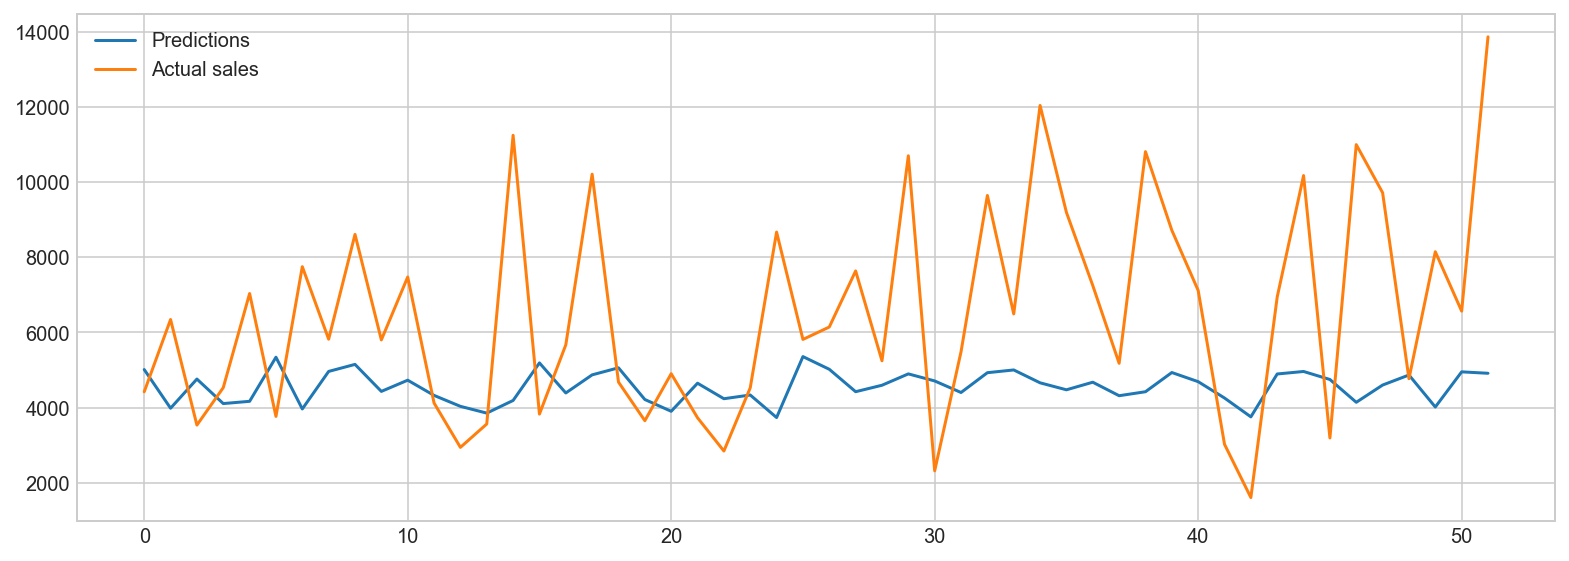

In [306]:
grid_GBR_pred=grid_GBR.predict(X_val)
plt.plot(grid_GBR_pred, label = 'Predictions')
plt.plot(y_val, label='Actual sales')
plt.legend(loc = 'upper left')
plt.show()

In [307]:
rmse_linear= sqrt(mean_squared_error(grid_GBR_pred, y_val))
rmse_linear

3399.28068378236

In [310]:
import xgboost
print(xgboost.__version__)

1.5.0
